<a href="https://colab.research.google.com/github/canasep/mack_projeto1/blob/main/codes/PROJETO_APLICADO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link collab to github

In [ ]:

!git clone https://github.com/canasep/mack_projeto1.git


Cloning into 'mack_projeto1'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 136 (delta 44), reused 7 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (136/136), 745.61 KiB | 10.21 MiB/s, done.
Resolving deltas: 100% (44/44), done.


create dataset with csv

In [ ]:
import pandas as pd

file_path = '/content/mack_projeto1/dataset/arquivos/RAW.csv'

try:
  df = pd.read_csv(file_path)
  print("Dataset created successfully!")
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")




Dataset created successfully!


show dataset

In [ ]:
df.head()


,loja,tipo,Shopping,software,data_assinado,data_entregue,data_primeiro_pedido,Irregular,pedidos_m0,pedidos_m1,pedidos_m2
0,Loja - 01,Lanches,Não,ANOTA,09/07/2024,19/08/2024,03/10/2024,NaN,2,0,0
1,Loja - 02,Hamburgueria / Hot Dog,Não,ANOTA,09/07/2024,18/07/2024,14/08/2024,NaN,101,251,187
2,Loja - 03,Hamburgueria / Hot Dog,Não,ANOTA,09/07/2024,18/07/2024,28/08/2024,NaN,16,71,113
3,Loja - 04,Hamburgueria / Hot Dog,Não,ANOTA,10/07/2024,23/08/2024,20/09/2024,NaN,10,18,19
4,Loja - 05,Hamburgueria / Hot Dog,Não,ANOTA,12/07/2024,27/07/2024,29/08/2024,NaN,20,112,85


In [ ]:
import matplotlib.pyplot as md


df['pedidos_m0'].mean()
df.describe()


,pedidos_m0,pedidos_m1,pedidos_m2
count,481.000000,481.000000,481.000000
mean,57.862786,80.887734,53.632017
std,132.328922,205.875114,185.986972
min,1.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000
50%,12.000000,12.000000,0.000000
75%,50.000000,70.000000,23.000000
max,1832.000000,2838.000000,2659.000000


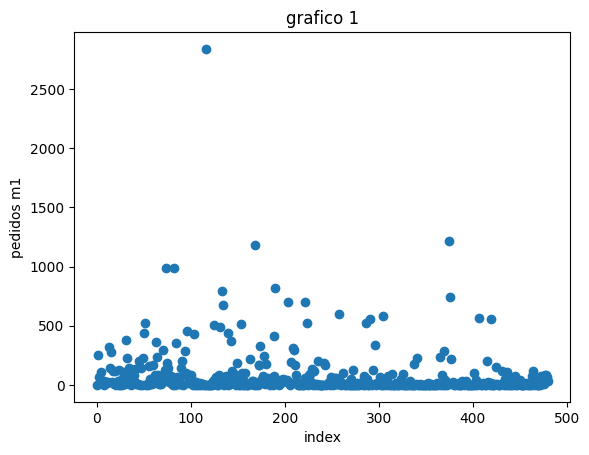

In [ ]:
md.scatter(df.index, df['pedidos_m1'])
md.title('grafico 1')
md.xlabel('index')
md.ylabel('pedidos m1')
md.show()